In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal

In [2]:
eeg_data = loadmat('../data/sampleEEGdata.mat')

In [14]:
data = eeg_data['EEG']['data'][0][0]
data.shape

(64, 640, 99)

In [44]:
times = eeg_data['EEG']['times'][0][0][0]

In [39]:
channel_labels = np.hstack(eeg_data['EEG']['chanlocs'][0][0]['labels'][0])
indx = np.where(channel_labels=='POz')[0][0]
# 'POz'

In [13]:
car1, car2 = np.zeros(data.shape), np.zeros(data.shape)

In [16]:
for trial in range(data.shape[2]):
    for t in range(data.shape[1]):
        
        car1[:, t, trial] = data[:, t, trial] - data[:, t, trial].mean(axis=0)

In [21]:
car2 = data - data.mean(axis=0)

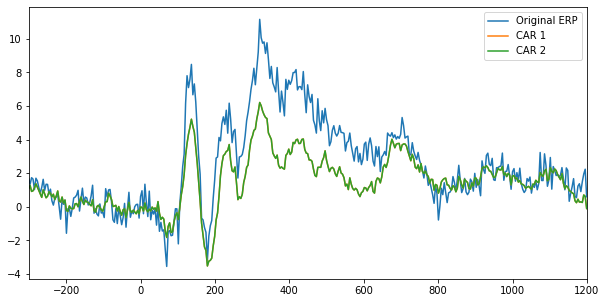

In [50]:
plt.figure(figsize=(10,5))
plt.plot(times, data[indx, :, :].mean(axis=1), label='Original ERP')
plt.plot(times, car1[indx, :, :].mean(axis=1), label='CAR 1')
plt.plot(times, car2[indx, :, :].mean(axis=1), label='CAR 2')
plt.legend()
plt.xlim([-300, 1200])
plt.show()